# Cobaya Examples

This first example is just following the simple quickstart example on the cobaya website. Here I explore what the parameters here do.

In [1]:
# Use dictionaries to define parameters of a distribution
info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05],
                     [0.05, 0.2]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -0.5, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": None}}

Now the sample can be run.

In [2]:
from cobaya.run import run

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 35300.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:1.991845, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-02 12:13:15 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.186
[mcmc]  - Convergence of means: R-1 = 0.137115 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.

[root] *WARNING* outlier fraction 0.016666666666666666 
Mean:
[0.22737129 0.01176437]
Covariance matrix:
[[0.09301449 0.02999473]
 [0.02999473 0.17189074]]


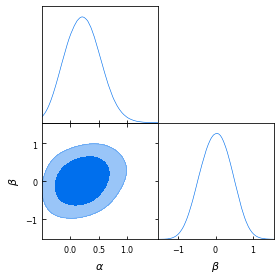

In [3]:
# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 35700.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:0.7387358, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-02 12:13:17 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.142
[mcmc]  - Convergence of means: R-1 = 0.557641 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

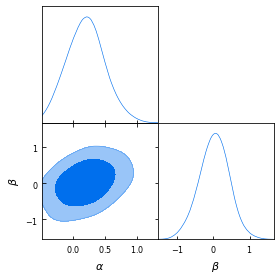

In [4]:
updated_info, sampler = run(info)

# Export the results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya

gd_sample = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)
%matplotlib inline
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)

This next part follows the more more complex example.

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 10900.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-02 12:13:18 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.667
[mcmc]  - Convergence of means: R-1 = 3.493720 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.483
[mcmc]  - Convergence of means: R-1 = 2.254555 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.25

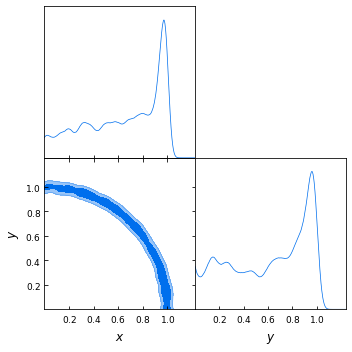

In [5]:
import numpy as np
from scipy import stats

def gauss_ring_logp(x, y, mean_radius=1, std=0.02):
    """
    Defines a gaussian ring likelihood on cartesian coordinater,
    around some ``mean_radius`` and with some ``std``.
    """
    return stats.norm.logpdf(np.sqrt(x**2 + y**2), loc=mean_radius, scale=std)

info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}

from cobaya.run import run
updated_info, sampler = run(info)

from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gdsamples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples, ["x", "y"], filled=True)

# Normalizing flows
Now lets start implementing a normalizing flow. For the first example I will use two gaussian likelihoods and a uniform prior.

Normalizing flows are implemented in tensorflow using Masked Autoencoders for Density Estimate (MADE) and Masked Autoregressive Flows (MAF). If $M$ is the true parameter space and $N$ an abstract parameter space (each with dimension $d$) and elements $x\in M$ and $y\in N$, the MADE implements a map

$$ f:N\rightarrow M $$
$$ y_i = T(x_{1:i-1})+S(x_{1:i-1})x_i $$

This is the autoregressive property. Note that the linear transformations $T$ and $S$ do not depend on the component index $i$. For each component of the abstract parameter $y$, the input to the linear transformations $T$ and $S$ are masked $ x_{1:i-1} = (x_1,\ldots,x_{i-1},0,\ldots,0)$.

The next step is the MAFs. And MAF determines an invertable affine map $f:M\rightarrow N$ of the form

$$ f(x) = L(x)+f(0) $$

i.e a shift and a linear transformation. In the tensorflow implementation, the affine transformation is called the shift_and_log_scale_fn and is a sequence of MADEs (note the similarity of the functions).

The process here is as follows: Sample from two posteriors using Cobaya. Take the difference between the samples to find the paramter difference posterior. Our neural network will be a MAF consisting of a sequence of $n$ MADEs (and optionally $n$ permutations, the probability should be invariant under coordinate permutations) allowing for nice expression of complicated posteriors. A sample will be taken from the modelled distribution and be propagated back through each MADE so the flow can be visualized. Finally the shift probability is calculated by determining the mass of the distribution with $P(x)>P(0)$ i.e

$$ P_{\text{shift}} = \int\limits_{P(x)>P(0)} P(x) dx $$ 

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 35400.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: a:-2.218218, b:0
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-02 12:13:22 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.230
[mcmc]  - Convergence of means: R-1 = 0.124393 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0

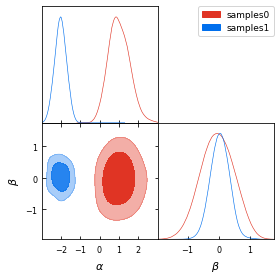

In [6]:
# Use dictionaries to define parameters of a distribution

#gaussian
info1 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [1, 0],
            "covs": [[0.3, 0.0],
                     [0.0, 0.3]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}

# different gaussian
info2 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [-2, 0],
            "covs": [[0.1, 0.0],
                     [0.0, 0.1]],
            "derived": True}},
    "params": dict([
        ("a", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("b", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}

updated_info1, sampler1 = run(info1)
updated_info2, sampler2 = run(info2)

gdsamples1 = MCSamplesFromCobaya(updated_info1, sampler1.products()["sample"])
gdsamples2 = MCSamplesFromCobaya(updated_info2, sampler2.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot([gdsamples1,gdsamples2], ["a", "b"], filled=True)

Now set up the parameter difference distribution. (I'm not completely sure this is the right way to do this. In the paper it says they did a numerical integration, however I'm not sure how to iplement that)

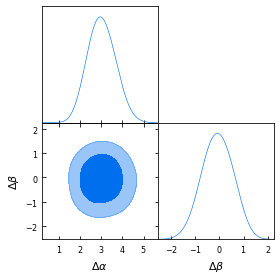

In [7]:
# separate dictionary into x,y arrays
a1 = gdsamples1['a']
b1 = gdsamples1['b']
a2 = gdsamples2['a']
b2 = gdsamples2['b']

# init difference arrays
diff_a = np.zeros([len(a1),len(a2)])
diff_b = np.zeros([len(b1),len(b2)])

# take each point in alpha and subtract each beta
for idx1 in range(len(a1)):
    for idx2 in range(len(a2)):
        diff_a[idx1][idx2] = a1[idx1]-a2[idx2]
        pass
    pass

for idx1 in range(len(b1)):
    for idx2 in range(len(b2)):
        diff_b[idx1][idx2] = b1[idx1]-b2[idx2]
        pass
    pass

# flatten to 1d
diff_a = diff_a.flatten()
diff_b = diff_b.flatten()

from getdist.mcsamples import MCSamples

# convert to MCSamples so it can be plotted with gdplot
diff = MCSamples(samples = [diff_a,diff_b],names=['da','db'], labels=['\\Delta \\alpha','\\Delta \\beta'])

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(diff, ["da", "db"], filled=True)

Now for the flow. It should only shift to the left by 3, so I only use one MAF and 5 epochs.

In [35]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

import tensorflow as tf
import tensorflow_probability as tfp
tfb = tfp.bijectors
tfd = tfp.distributions
tfk = tf.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import Callback

class Callback(tfk.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self._loss = []
        self._epoch = []
        print("Starting training...")
        
    def on_epoch_begin(self, epoch, logs=None):
        if(epoch % 5 == 0):
            print("Begin Epoch {}...".format(epoch))

    def on_epoch_end(self, epoch, logs=None):
        self._loss.append(logs['loss'])
        self._epoch.append(epoch)
        if((epoch + 1) % 5 == 0):
            print("End Epoch {}. Loss = {:5.5f}. Validation loss = {:5.5f}".format(epoch,logs['loss'],logs['val_loss']))

    def on_train_end(self, logs=None):
        fig,ax1 = plt.subplots(1,1) #(ax1, ax2) = plt.subplots(1,2)
        
        ax1.set_title('loss vs. epoch')
        ax1.set_xlabel('epoch')
        ax1.set_ylabel('loss')
        ax1.plot(self._epoch,self._loss)
        
        print("Completed training!")

    #def on_test_begin(self, logs=None):
    #    print("Start testing...")

    #def on_test_end(self, logs=None):
    #    print("Testing completed. Loss = {:5.5f}".format(logs['loss']))


Starting training...
Begin Epoch 0...
End Epoch 4. Loss = -0.51004. Validation loss = -0.55646
Completed training!


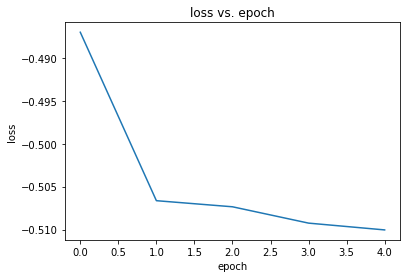

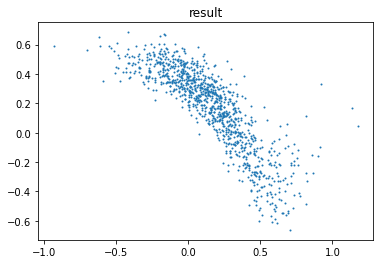

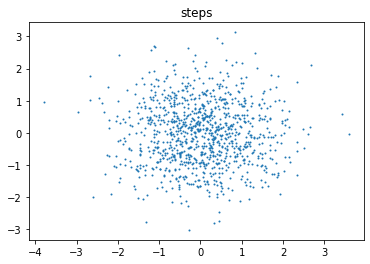

In [36]:
def sample(n,dist):
    p = dist.sample(n)
    px = p[...,0]
    py = p[...,1]
    return (px,py,p)
    
def train(base,X,Y,n_maf,n,batch_size,permute,n_epochs):
    nsamples=n
    ## NN setup
    # Set up bijector MADE
    made = tfb.AutoregressiveNetwork(params=2, hidden_units=[12,12], activation=tf.math.asinh, kernel_initializer='glorot_uniform')
    bijectors=[]
    if(permute==True):
        _permutations = [np.random.permutation(2) for _ in range(n_maf)]
    else:
        _permutations=False
    
    for i in range(n_maf):
        # the permutation part comes from the code M. Raveri wrote,
        # The x direction does not want to separate, so I want to see if permuting the input can help
        if _permutations:
            #print(_permutations[i])
            bijectors.append(tfb.Permute(_permutations[i].astype(np.int32)))
        # rest by myself
        bijectors.append(tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn=made))
        
    target_distribution = tfd.TransformedDistribution(
        distribution=tfd.Sample(base),
        bijector=tfb.Chain(bijectors)) 

    
    # now perform the fit
    xdata = np.stack([X, Y], axis=-1)
    ydata = base.sample(nsamples)
    #print(data)
    #plt.scatter(X,Y,s=5)

    # Construct model.
    x_ = tfk.Input(shape=(2,), dtype=tf.float32)
    log_prob_ = target_distribution.log_prob(x_)
    model = tfk.Model(x_, log_prob_)

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                  metrics=['accuracy'],
                  loss=lambda _, log_prob: -log_prob) 

    loss_plot = []
    #batch_size = 1000
    model.fit(x=xdata,
              y=np.zeros((int(2*nsamples), 2), dtype=np.float32),
              batch_size=batch_size,
              epochs=n_epochs,
              steps_per_epoch=n/(2*batch_size),  # Usually `n // batch_size`.
              validation_split=0.2,
              shuffle=True,
              verbose=False,
              callbacks=[Callback()]) #, ydata
    
    # need to create test set.
    #model.evaluate(x=xdata,y=np.zeros(int(nsamples)),callbacks=[Callback()])
    
    return(target_distribution)
    
def plot(x,y,title):
    plt.figure()
    plt.title(title)
    plt.scatter(x,y,s=1)
    
# defines the distribution we want to map to
trained_dist = tfd.MultivariateNormalDiag(loc=[0.,0.], scale_diag=[1.,1.])

x = diff['da']
y = diff['db']

# train
trained_dist = train(trained_dist,x,y,n_maf=1,n=len(x),batch_size=1000,permute=False,n_epochs=5)# The result should not depend on the change of variables z1<->z2 

# plot modelled dist
tx,ty,txy=sample(1000,trained_dist)
plot(tx,ty,'result')

# plot each MADE
l_bijectors = np.array(trained_dist.bijector.bijectors)#np.flipud()
step_data=txy
for bij in l_bijectors:
    step_data = bij.inverse(step_data)
    plot(step_data[...,0],step_data[...,1],'steps')

In [ ]:
prob = trained_dist.prob([0.,0.])
print(float(prob))

x , y = np.mgrid[-1:7:.05, -4:4:.05]
xy = np.stack((x, y), axis=-1)

z = trained_dist.prob(xy)
plt.contourf(x,y,z)
plt.contour(x,y,z,levels=[prob],colors='w')
plt.plot([0,0],[-4,4],color='k',linestyle='dashed')
plt.plot([-1,7],[0,0],color='k',linestyle='dashed')
plt.scatter(0,0,color='k')

In [11]:
# integrate

n_points = 10000
n_pass = 0

_s = trained_dist.sample(n_points)
_v = trained_dist.prob(_s)
for val in _v:
    if val>prob:
        n_pass+=1
        
print(n_pass/n_points)

1.0


How about something more complicated...

[ring] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {ring: 8080.0}
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: x:0.5, y:0.5
[mcmc] Sampling!
[mcmc] Progress @ 2022-04-02 13:05:49 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.688
[mcmc]  - Convergence of means: R-1 = 5.332328 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.520
[mcmc]  - Convergence of means: R-1 = 0.809054 after 128 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 240 samples accepted.
[mcmc]  - Acceptance rate: 0.355

[mcmc] Learn + convergence test @ 2960 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.041045 after 2368 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3040 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.025649 after 2432 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3120 samples accepted.
[mcmc]  - Acceptance rate: 0.089
[mcmc]  - Convergence of means: R-1 = 0.014817 after 2496 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3200 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.018946 after 2560 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 3280 samples accepted.
[mcmc]  - Acceptance rate: 0.088
[mcmc]  - Convergence of means: R-1 = 0.014887

[mcmc]  - Convergence of means: R-1 = 0.026118 after 1472 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 1920 samples accepted.
[mcmc]  - Acceptance rate: 0.314
[mcmc]  - Convergence of means: R-1 = 0.016252 after 1536 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2000 samples accepted.
[mcmc]  - Acceptance rate: 0.314
[mcmc]  - Convergence of means: R-1 = 0.012856 after 1600 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2080 samples accepted.
[mcmc]  - Acceptance rate: 0.315
[mcmc]  - Convergence of means: R-1 = 0.007740 after 1664 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 2160 samples accepted.
[mcmc]  - Acceptance rate: 0.314
[mcmc]  - Convergence of means: R-1 = 0.007511 after 1728 accepted steps
[mcmc]  - Convergence of bounds: R-1 = 0.128549 after 2160 acce

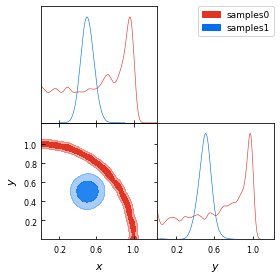

In [54]:
# Ring from before
info = {"likelihood": {"ring": gauss_ring_logp}}

info["params"] = {
    "x": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01},
    "y": {"prior": {"min": 0, "max": 2}, "ref": 0.5, "proposal": 0.01}}

info["sampler"] = {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}

# Gaussian
info1 = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.5, 0.5],
            "covs": [[0.005, 0.0],
                     [0.0, 0.005]],
            "derived": True}},
    "params": dict([
        ("x", {
            "prior": {"min": -3, "max": 3},
            "latex": r"\alpha"}),
        ("y", {
            "prior": {"min": -3, "max": 3},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta"}),
        ("derived_a", {
            "latex": r"\alpha^\prime"}),
        ("derived_b", {
            "latex": r"\beta^\prime"})]),
    "sampler": {
        "mcmc": {"Rminus1_stop": 0.01, "max_tries": 1000}}}


updated_info, sampler = run(info)
updated_info1, sampler1 = run(info1)

gdsamples1 = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdsamples2 = MCSamplesFromCobaya(updated_info1, sampler1.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot([gdsamples1,gdsamples2], ["x", "y"], filled=True)

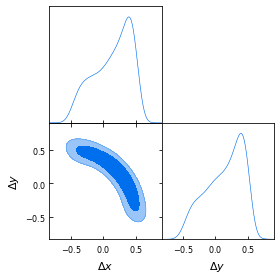

In [55]:
a1 = gdsamples1['x']
b1 = gdsamples1['y']
a2 = gdsamples2['x']
b2 = gdsamples2['y']

diff_a = np.zeros([len(a1),len(a2)])
diff_b = np.zeros([len(b1),len(b2)])

for idx1 in range(len(a1)):
    for idx2 in range(len(a2)):
        diff_a[idx1][idx2] = a1[idx1]-a2[idx2]
        pass
    pass

for idx1 in range(len(b1)):
    for idx2 in range(len(b2)):
        diff_b[idx1][idx2] = b1[idx1]-b2[idx2]
        pass
    pass
   
diff_a = diff_a.flatten()
diff_b = diff_b.flatten()

from getdist.mcsamples import MCSamples

diff = MCSamples(samples = [diff_a,diff_b],names=['da','db'], labels=['\\Delta x','\\Delta y'])

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(diff, ["da", "db"], filled=True)

Starting training...
Begin Epoch 0...


/home/evan/.local/lib/python3.10/site-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


End Epoch 4. Loss = -0.47848. Validation loss = -0.54500
Completed training!


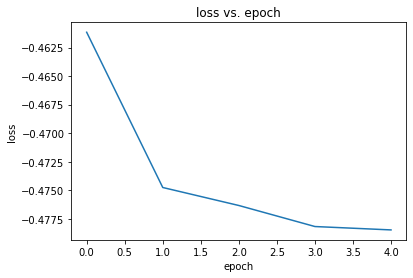

In [56]:
def plot(x,y,title):
    plt.figure()
    plt.title(title)
    plt.hist2d(x,y,bins=[np.linspace(-3,3,100),np.linspace(-3,3,100)])

trained_dist = tfd.MultivariateNormalDiag(loc=[0.,0.], scale_diag=[1.,1.])

x = diff['da']
y = diff['db']

trained_dist = train(trained_dist, x, y, n_maf=3, n=len(x), batch_size=1000, permute=False, n_epochs=5)# The result should not depend on the change of variables z1<->z2 


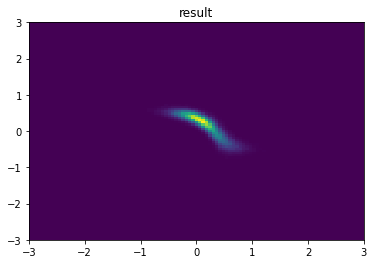

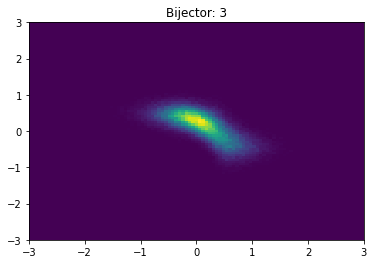

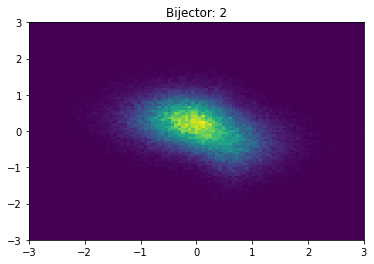

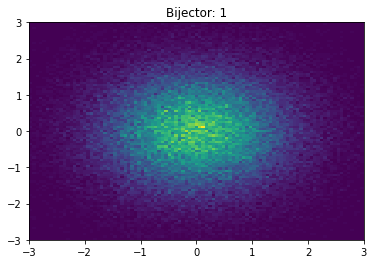

In [138]:
#get bijectors
l_bijectors = np.array(trained_dist.bijector.bijectors)#np.flipud()

#initial sample
tx,ty,txy=sample(100000,trained_dist)
plot(tx,ty,'result')
step_data=txy

# pullback of samples under each bijector
maf=len(l_bijectors)
for bij in l_bijectors:
    step_data = bij.inverse(step_data)
    plot(step_data[...,0],step_data[...,1],'Bijector: {}'.format(maf))
    maf -= 1

0.008851527236402035


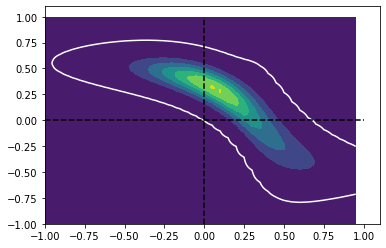

In [139]:
# get P(0)
prob = trained_dist.prob([0.,0.])
print(float(prob))

# evaluate modelled dist on a grid
x , y = np.mgrid[-1:1:.05, -1:1:.01]
xy = np.stack((x, y), axis=-1)

z = trained_dist.prob(xy)

# plot contour at z=P(0)
plt.contourf(x,y,z)
plt.contour(x,y,z,levels=[prob],colors='w')
plt.plot([0,0],[-1,1],color='k',linestyle='dashed')
plt.plot([-1,1],[0,0],color='k',linestyle='dashed')
plt.scatter([0],[0],color='k',s=10)

In [140]:
# integrate
# Need to implement stat analysis of the integration

n_points = 10000
n_pass = 0

_s = trained_dist.sample(n_points)
_v = trained_dist.prob(_s)
for val in _v:
    if val>prob:
        n_pass+=1
        
print(n_pass/n_points)

0.9976


Now, I want to demonstrate some ways of visualizing this flow (or at least the vector field that generates the flows).

In [189]:
from matplotlib import animation, rc, colors
from IPython import display

#get bijectors
l_bijectors = np.array(trained_dist.bijector.bijectors)#np.flipud()

#initial sample
tx,ty,txy=sample(10000,trained_dist)
#plot(tx,ty,'result')
step_data=txy

# pullback of samples under each bijector
maf=len(l_bijectors)

xdata=[]
ydata=[]

# pause for a bit at the start
for i in range(5):
    xdata.append(tx)
    ydata.append(ty)

for bij in l_bijectors:
    pb_step_data = bij.inverse(step_data)

    xi = step_data[...,0]
    xf = pb_step_data[...,0]
    yi = step_data[...,1]
    yf = pb_step_data[...,1]

    # now we have a set of points to go between, just do linearly
    dx = np.linspace(xi,xf,10)
    dy = np.linspace(yi,yf,10)
    
    for array in dx:
        xdata.append(array)
    for array in dy:
        ydata.append(array)
    
    step_data = pb_step_data

# pause for a bit at the end
length = len(xdata)-1
for i in range(5):
    xdata.append(xdata[length])
    ydata.append(ydata[length])

# set up animation
fig, ax = plt.subplots(figsize = (8,8))

#Create 2d Histogram
data,x,y = np.histogram2d(x=tx,y=ty, bins=[np.linspace(-3,3,50),np.linspace(-3,3,50)])

#Smooth with filter
im = plt.imshow(data.transpose()[::-1],extent=[-3,3,-3,3],interpolation = 'gaussian',norm=colors.Normalize())#interpolation = 'gaussian',interpolation='nearest'

#Define animation. 
def animate(i) :
    X = i[...,0]
    Y = i[...,1]
    data,x,y = np.histogram2d(X,Y, bins=[np.linspace(-3,3,50),np.linspace(-3,3,50)])
    
    im.set_data(data.transpose()[::-1])
    im.set_norm(norm=colors.Normalize())

ani = animation.FuncAnimation(fig, animate, frames=np.stack([xdata,ydata],axis=-1),
                          interval = 100, blit = False)

plt.rcParams['animation.ffmpeg_path']

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

[matplotlib.animation] Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
[matplotlib.animation] MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 576x576 -pix_fmt rgba -r 10.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmphj9q5n8h/temp.m4v
